<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 772.8 kB/s eta 0:00:00


In [2]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 64.6 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [3]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [4]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-05-09'

In [5]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [6]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-04-29,2565.419922,2571.409912,2542.250000,2550.250000,547100
2025-04-30,2556.610107,2570.830078,2544.459961,2561.040039,487500
2025-05-02,2559.790039,2567.040039,2540.570068,2556.520020,585500
2025-05-07,2573.800049,2581.850098,2559.169922,2577.040039,546800
2025-05-08,2579.479980,0.000000,0.000000,0.000000,0


In [7]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-04-29,2550.25,2571.41,2542.25,2565.42,547081468,0.0065,1,16.56,9215174352275,2.100882e+15
2025-04-30,2561.04,2570.83,2544.46,2556.61,487488833,-0.0034,2,-8.81,8435602446234,2.094129e+15
2025-05-02,2556.52,2567.04,2540.57,2559.79,585492284,0.0012,1,3.18,8327449263431,2.095822e+15
2025-05-07,2577.04,2581.85,2559.17,2573.80,546755132,0.0055,1,14.01,8935449197459,2.106865e+15
2025-05-08,2581.27,2590.90,2575.78,2579.48,471635814,0.0022,1,5.68,10270131237563,2.111360e+15


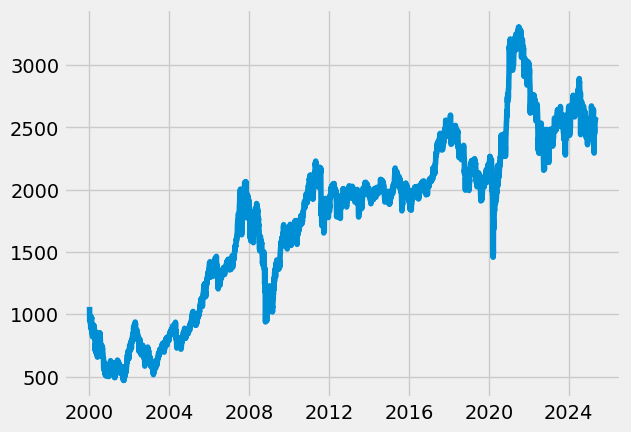

In [8]:
datag1=data1[['Close']]
plt.plot(datag1)

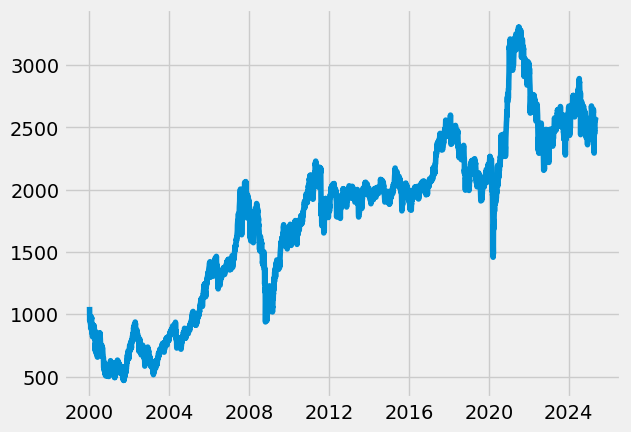

In [9]:
datag2=data2[['Close']]
plt.plot(datag2)

In [10]:
Kospi=data1

In [11]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [12]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-04-29,2565.419922,2571.409912,2542.250000,2550.250000,547100,0.006476
2025-04-30,2556.610107,2570.830078,2544.459961,2561.040039,487500,-0.003440
2025-05-02,2559.790039,2567.040039,2540.570068,2556.520020,585500,0.001243
2025-05-07,2573.800049,2581.850098,2559.169922,2577.040039,546800,0.005458
2025-05-08,2579.479980,0.000000,0.000000,0.000000,0,0.002204


In [13]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

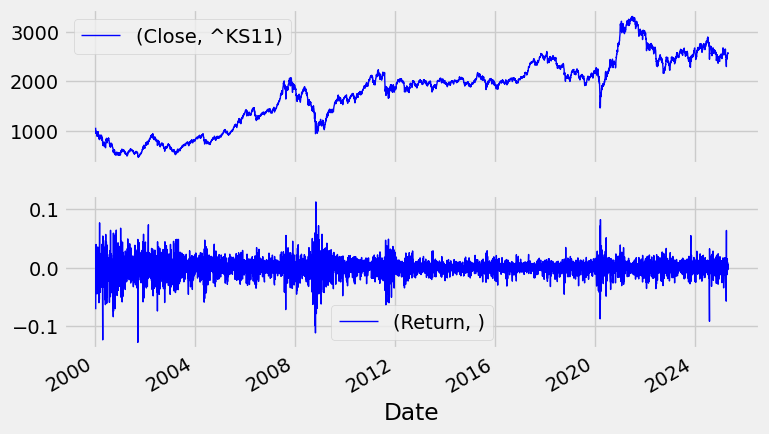

In [14]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [15]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [16]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-04-29,2565.419922,2525.547485,2600.931997
2025-04-30,2556.610107,2525.509491,2600.431914
2025-05-02,2559.790039,2525.100244,2599.704539
2025-05-07,2573.800049,2525.358246,2598.990997
2025-05-08,2579.479980,2525.585498,2598.438248


<Axes: xlabel='Date'>

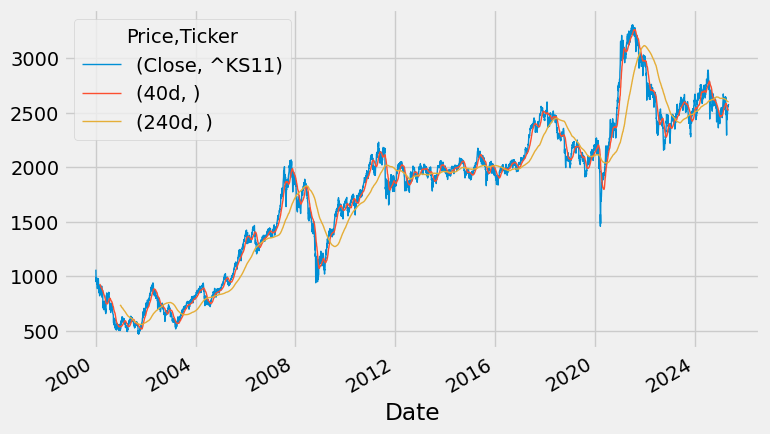

In [17]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [18]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

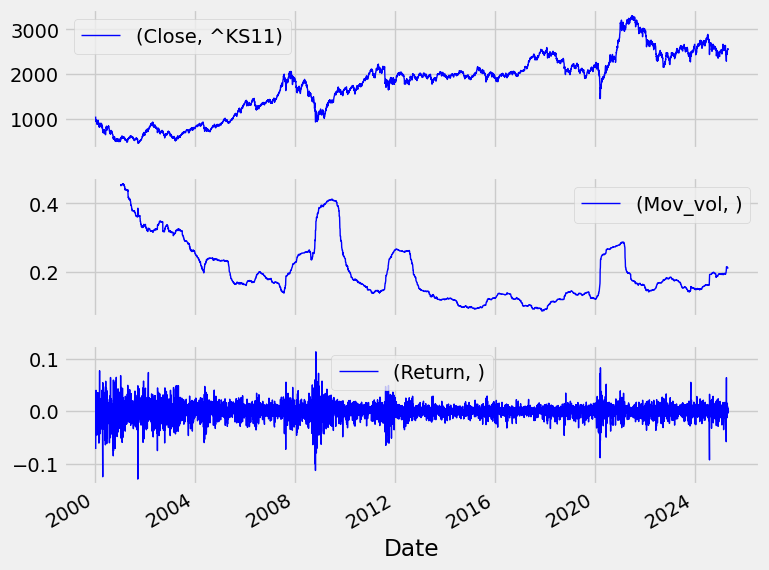

In [19]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

#### 주요 주가지수 분석

In [20]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [22]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [23]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [24]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [25]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [26]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [27]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


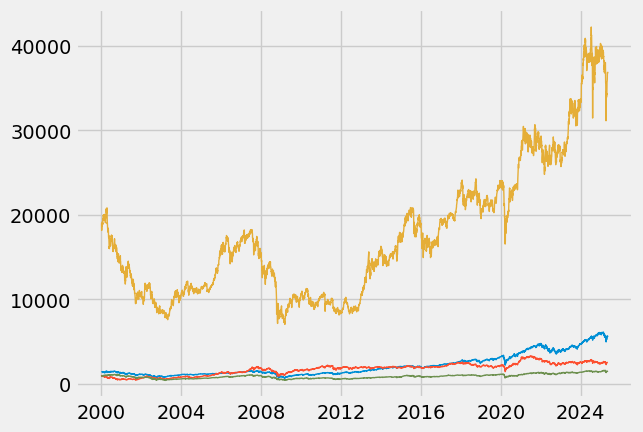

In [28]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [29]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

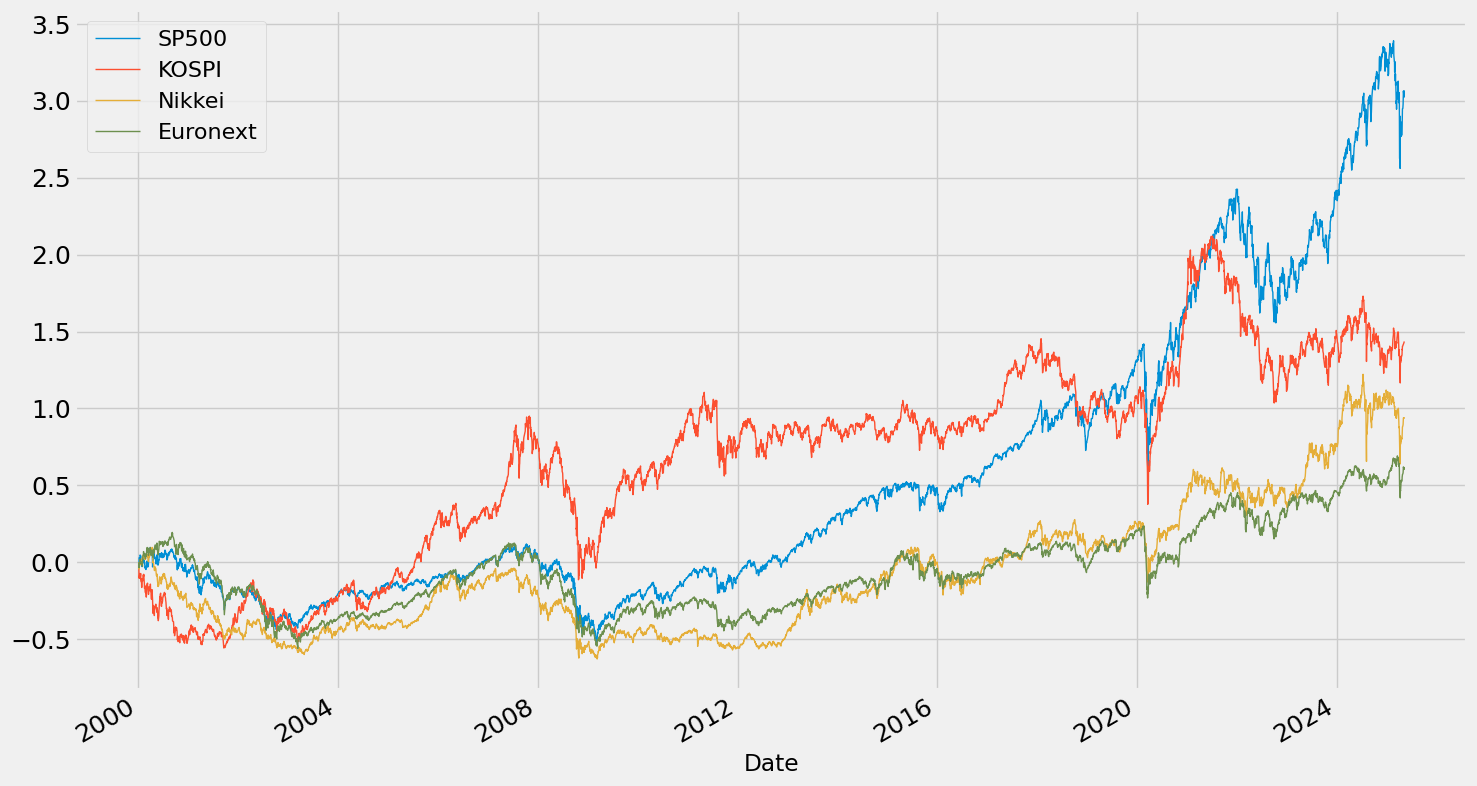

In [30]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

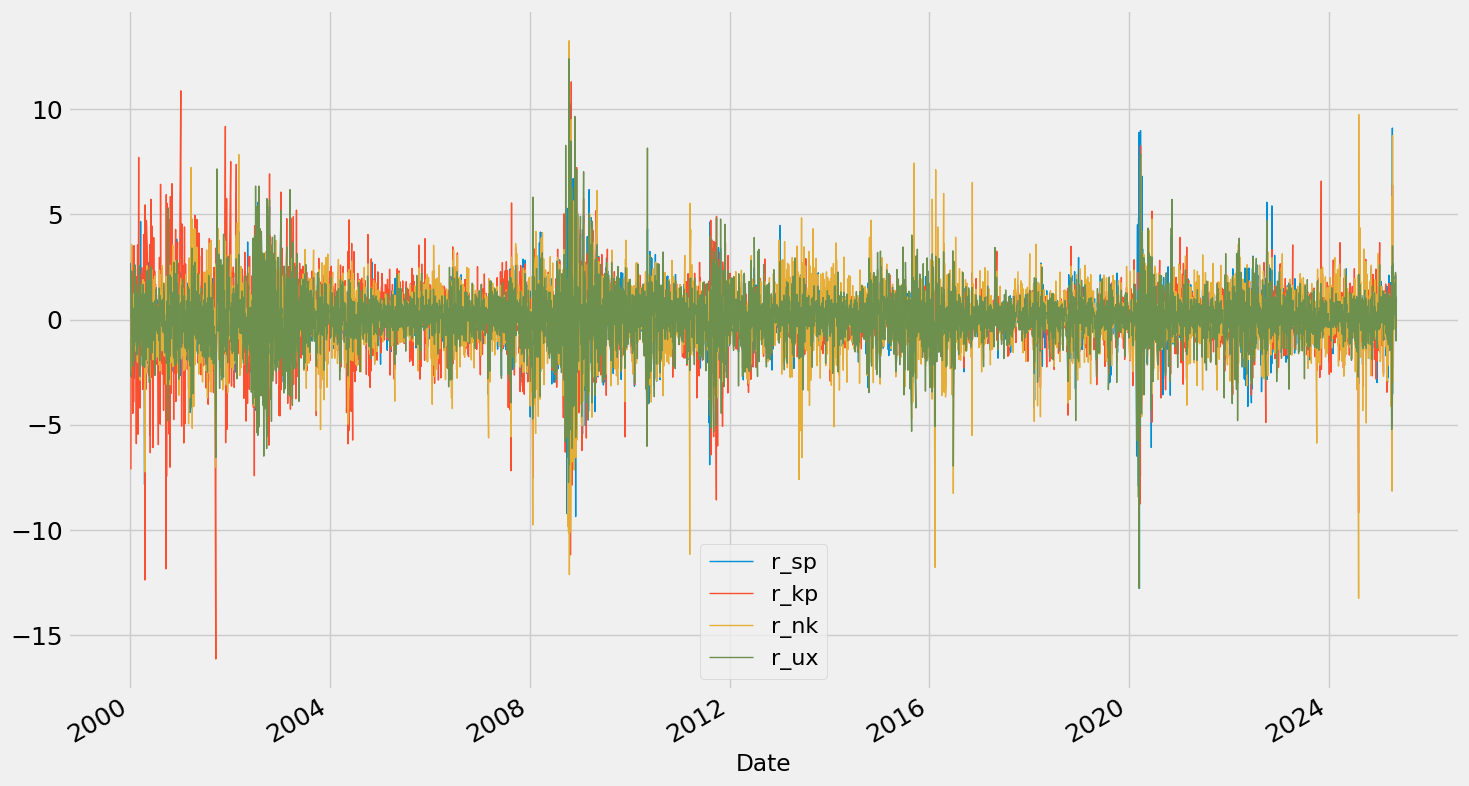

In [31]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [32]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5686.000000,5686.000000,5686.000000,5686.000000
mean,2153.400230,1769.984636,17530.744025,903.915288
std,1300.037723,684.877104,7953.607833,259.787217
min,676.530029,468.760010,7054.979980,419.950012
25%,1203.252472,1234.735046,10837.567627,689.842514
50%,1498.354980,1936.349976,15890.754883,874.730011
75%,2792.164917,2206.367432,21778.279297,1050.125000
max,6144.149902,3305.209961,42224.019531,1617.060059


In [33]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5685.000000,5685.000000,5685.000000,5685.000000
mean,0.024683,0.015659,0.011687,0.008482
std,1.290145,1.527530,1.544070,1.348343
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.495963,-0.638190,-0.734307,-0.598770
50%,0.070551,0.070638,0.053357,0.061033
75%,0.614088,0.761320,0.834917,0.664122
max,10.423562,11.284352,13.234592,12.378520


In [34]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5685.000000  5685.000000  5685.000000  5685.000000
mean      0.024683     0.015659     0.011687     0.008482
std       1.290145     1.527530     1.544070     1.348343
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495963    -0.638190    -0.734307    -0.598770
50%       0.070551     0.070638     0.053357     0.061033
75%       0.614088     0.761320     0.834917     0.664122
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.402769
r_kp   -0.596024
r_nk   -0.473311
r_ux   -0.150891
dtype: float64
kurtosis:  r_sp    9.980075
r_kp    9.046618
r_nk    7.352136
r_ux    7.362668
dtype: float64


In [35]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.686000e+03    5686.000000  5.686000e+03   5686.000000
mean   2.153400e+03    1769.984636  1.753074e+04    903.915288
std    1.300038e+03     684.877104  7.953608e+03    259.787217
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.203252e+03    1234.735046  1.083757e+04    689.842514
50%    1.498355e+03    1936.349976  1.589075e+04    874.730011
75%    2.792165e+03    2206.367432  2.177828e+04   1050.125000
max    6.144150e+03    3305.209961  4.222402e+04   1617.060059
var    1.690098e+06  469056.647933  6.325988e+07  67489.398343
skew   1.235540e+00      -0.218864  1.007933e+00      0.564513
kurt   5.188195e-01      -0.776449  3.679943e-01     -0.348620


In [36]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5685.000000  5685.000000  5685.000000  5685.000000
mean      0.024683     0.015659     0.011687     0.008482
std       1.290145     1.527530     1.544070     1.348343
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.495963    -0.638190    -0.734307    -0.598770
50%       0.070551     0.070638     0.053357     0.061033
75%       0.614088     0.761320     0.834917     0.664122
max      10.423562    11.284352    13.234592    12.378520
var       1.664474     2.333349     2.384153     1.818029
skew     -0.402769    -0.596024    -0.473311    -0.150891
kurt      9.980075     9.046618     7.352136     7.362668


In [37]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.778863,0.963591,0.905131
KOSPI,0.778863,1.000000,0.714739,0.659558
Nikkei,0.963591,0.714739,1.000000,0.956069
Euronext,0.905131,0.659558,0.956069,1.000000


In [38]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.227834,0.197954,0.593649
r_kp,0.227834,1.000000,0.612157,0.377024
r_nk,0.197954,0.612157,1.000000,0.401218
r_ux,0.593649,0.377024,0.401218,1.000000


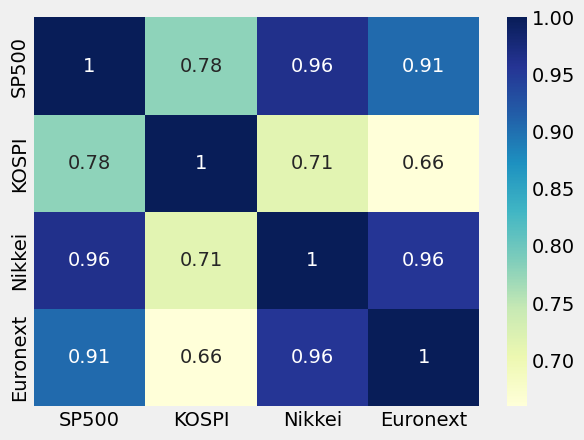

In [39]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

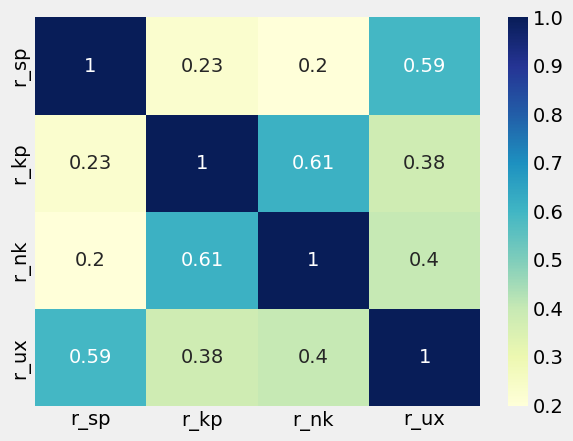

In [40]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [41]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [42]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [43]:
data.tail()

,SP500,VIX
Date,,
2025-05-02,5686.669922,22.680000
2025-05-05,5650.379883,23.639999
2025-05-06,5606.910156,24.760000
2025-05-07,5631.279785,23.549999
2025-05-08,5695.370117,22.330000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

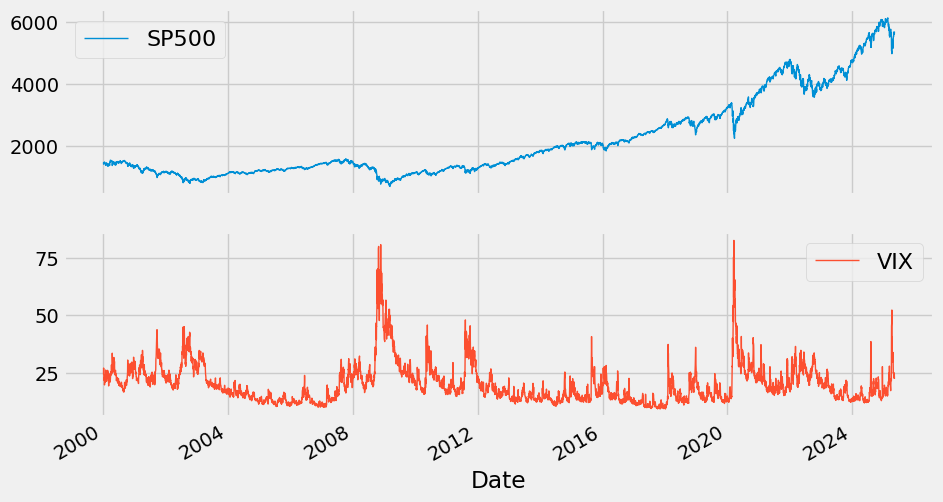

In [44]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

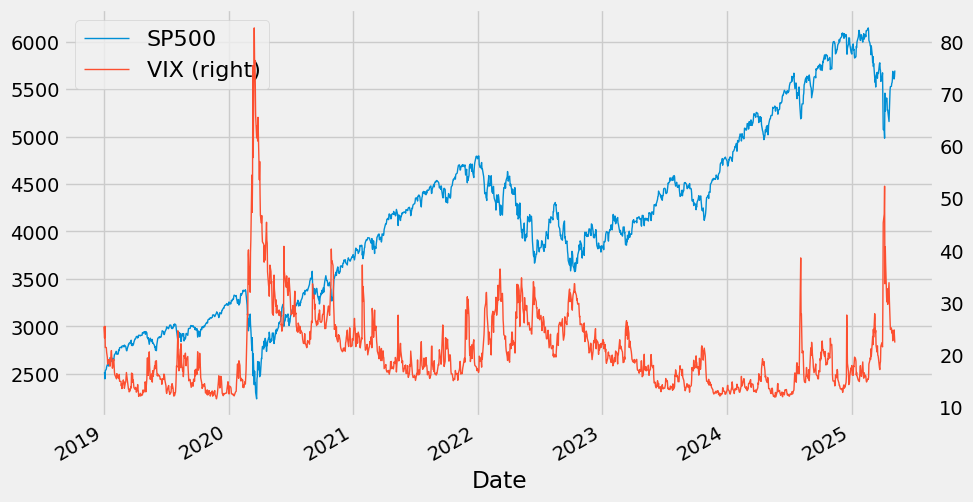

In [45]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [46]:
rets = np.log(data / data.shift(1))

In [47]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [48]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

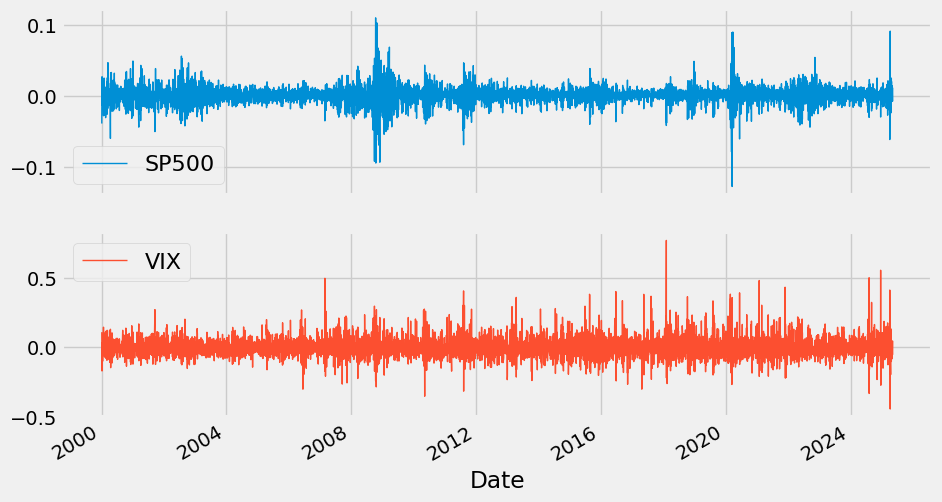

In [49]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

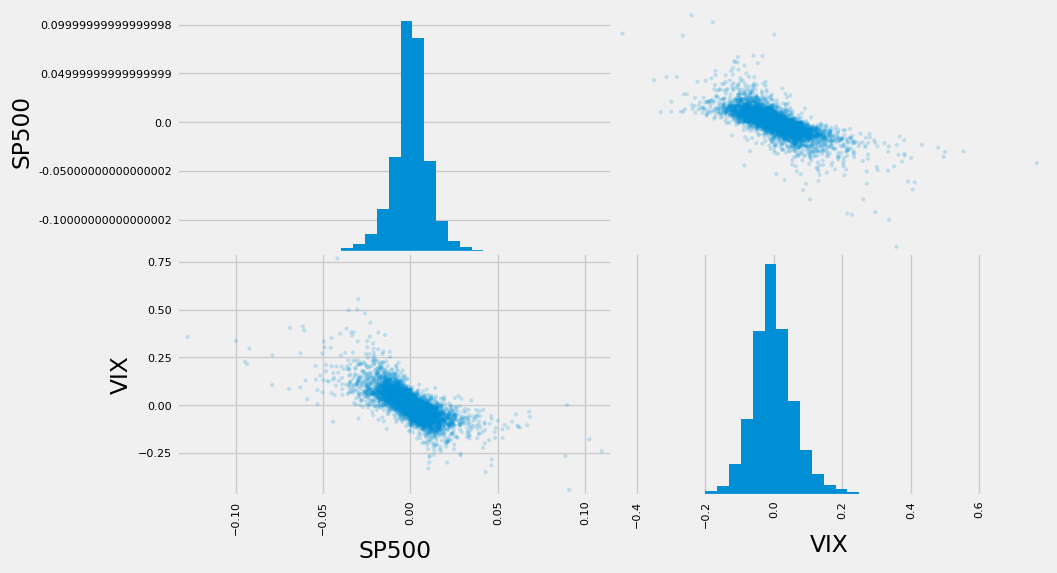

In [50]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [51]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

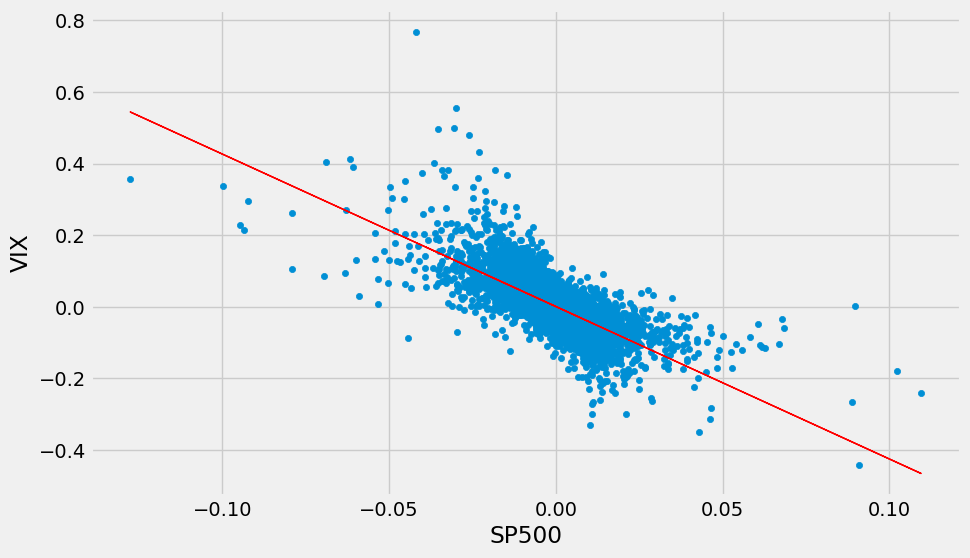

In [52]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [53]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.731771
VIX,-0.731771,1.000000


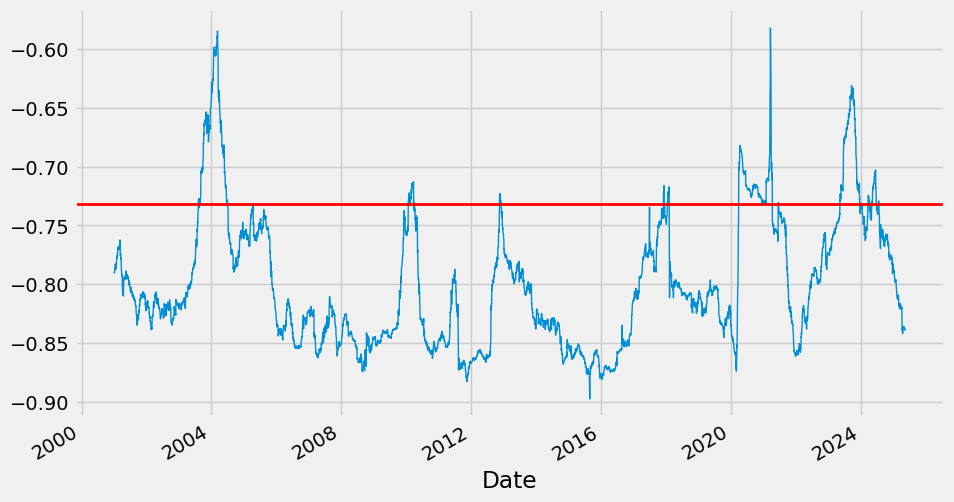

In [54]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')